In [99]:
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt

import torch
from torchvision.transforms import v2

# plt.rcParams["savefig.bbox"] = 'tight'

# if you change the seed, make sure that the randomly-applied transforms
# properly show that the image can be both transformed and *not* transformed!
torch.manual_seed(0)

# If you're trying to run that on Colab, you can download the assets and the
# helpers from https://github.com/pytorch/vision/tree/main/gallery/
from helpers import plot
orig_img = Image.open("/home/qsvm/lib_ocr/experiment/vietocr_img_441026.jpg")

In [100]:
class Scaling:
    def __call__(self, image):
        w, h = image.size
        H = 100
        scale_ratio = H/h
        return v2.functional.resize(image,(H, int(w*scale_ratio)))

In [ ]:
data_transforms_2 = {
    "train": v2.Compose(
        [
            Scaling(),
            v2.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
            v2.RandomAffine(degrees=5, scale=(0.9, 1.1)),
            # v2.ToTensor(),
            # v2.Normalize(
            #     mean=[0.485, 0.456, 0.406],
            #     std=[0.229, 0.224, 0.225],
            # )
        ]
    ),
    "val": v2.Compose(
        [
            Scaling(),
            v2.ToTensor(),
            v2.Normalize(
                mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225],
            )
        ]
    ),
}

/home/qsvm/miniconda3/envs/ai/lib/python3.13/site-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


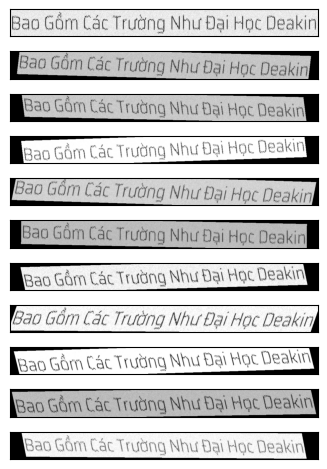

In [102]:
affine_imgs = [data_transforms_2["train"](orig_img) for _ in range(10)]
plot([orig_img] + affine_imgs)
# plot([img])

NameError: name 'np' is not defined